<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification/blob/main/Data_Preprocessing_Smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data from GitHub and installing package


The project is hosted on GitHub. Get a copy by running:

In [ ]:
!git clone https://github.com/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification.git

Cloning into 'Dusty-Stellar-Sources-Classification'...
remote: Enumerating objects: 369, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 369 (delta 47), reused 4 (delta 4), pack-reused 280
Receiving objects: 100% (369/369), 49.02 MiB | 15.60 MiB/s, done.
Resolving deltas: 100% (185/185), done.


In [ ]:
!pip install pyunpack

In [ ]:
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 589.6 kB/s eta 0:00:00


# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io, requests, zipfile
from zipfile import ZipFile
import seaborn as sns
from sklearn.metrics import confusion_matrix , accuracy_score , recall_score , precision_score , f1_score , classification_report
from pyunpack import Archive
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#https://blog.finxter.com/how-to-plot-sklearn-confusion-matrix-with-labels/
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True,
                          size = [16,12],
                          file_name = False ):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if cmap is None:
        cmap = plt.get_cmap('Greens')

    plt.figure(figsize=(size[0],size[1]))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title ,fontsize = 16 )
    plt.ylabel('True label' , fontsize = 16 )
    plt.xlabel('Predicted label', fontsize = 16 )
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)




    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            #if cm[i,j]>= 0.01 : # if you want remove 0.1>
                plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                        horizontalalignment="center",
                        color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    if file_name != False :
        plt.savefig(file_name , dpi=300)
    plt.show()

# Data Pre

In [ ]:
df = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Preprocessed_Data.csv")

In [ ]:
df

,RAdeg,DEdeg,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],SpClass,GeneralClass
0,69.338100,-70.579000,NaN,-0.485,-2.258,-4.690,-6.112,-7.032,-7.329,-7.6101,-7.7148,-7.8326,-8.0159,-8.8792,OAGB,DSS
1,71.613100,-68.796300,1.307,1.954,0.325,-2.250,-3.502,-5.238,-6.803,-8.6656,-9.3873,-9.8100,-10.2429,-11.1944,CAGB,DSS
2,71.827700,-69.705700,-1.052,-3.148,-5.010,-7.333,-8.420,-9.248,-9.515,-9.6540,-9.4759,-9.6545,-9.7627,-10.9685,RSG,DSS
3,72.157300,-69.393600,NaN,3.178,2.261,1.023,NaN,NaN,-5.600,-8.1534,-9.0379,-9.8431,-10.6543,-13.6554,YSO,DSS
4,72.393200,-69.097000,-5.412,-5.208,-5.460,-6.105,-6.339,-6.739,-7.281,-8.4329,-8.9152,-9.2952,-9.9431,-11.3106,OAGB,DSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,14.527078,-72.068717,-0.619,-0.522,-1.027,-1.728,-2.806,-3.214,-3.766,-5.5270,-5.6600,-8.0320,-9.6220,-15.6450,YSO,DSS
614,14.488457,-72.654396,-1.593,-0.817,-1.266,-1.993,-3.270,-3.795,-4.912,-6.6860,-7.2730,-8.2610,-9.2260,-15.2890,YSO,DSS
615,14.027887,-72.789808,-1.605,-1.218,-1.578,-2.070,-2.708,-3.195,-3.745,-5.4810,-5.9750,-7.7430,-9.1680,-15.3400,YSO,DSS
616,16.039817,-72.837738,-2.357,-3.880,-5.665,NaN,-8.645,-9.325,-9.593,-9.6990,-9.7110,-9.9220,-10.0500,-10.8040,OAGB,DSS


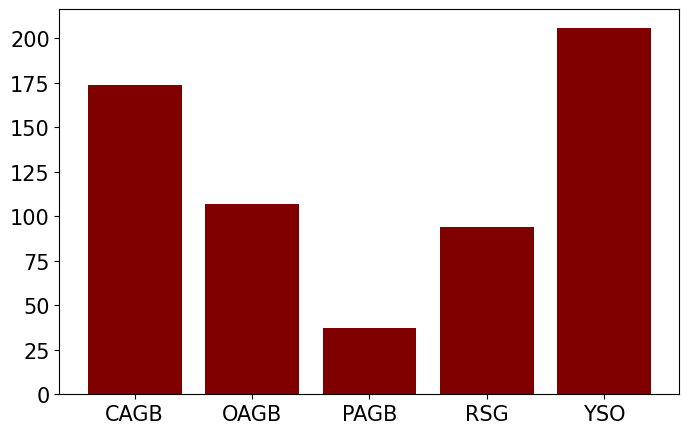

In [ ]:
n = df.pivot_table(index=['SpClass'], aggfunc='size').index
s = list(df.pivot_table(index=['SpClass'], aggfunc='size'))

fig=plt.figure(figsize=(8,5))
line = plt.bar(n  , s  , color = 'maroon' , log  = False )

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.show()
fig.savefig('SPclass_hist.pdf',dpi=400)

In [ ]:
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()
Y = LE.fit_transform(df['SpClass'])
Y = pd.DataFrame(Y)
Y.columns = ['EY']

print('Ordinal Encoding:')
LE.inverse_transform(np.arange(0,5))

Ordinal Encoding:


array(['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'], dtype=object)

Here we use an algorithm named IterativeImputer to fill the blank (NaN) data points.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

For more information : https://scikit-learn.org/stable/modules/impute.html#iterative-imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer( random_state= 0 )
df[df.columns[2:-2]] = imp.fit_transform(df[df.columns[2:-2]])

In [ ]:
X = df[df.columns[2:-2]]
Y = Y['EY']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size= 0.10 , random_state = 1234 )
print('X_train : ' , X_train.shape)
print('X_test : ' , X_test.shape)
print('Y_train : ' , Y_train.shape)
print('Y_test : ' , Y_test.shape)

X_train :  (556, 12)
X_test :  (62, 12)
Y_train :  (556,)
Y_test :  (62,)


Smote

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from IPython.display import clear_output
clear_output(wait=True)

sm = SMOTE(n_jobs=-1)
AX_train , AY_train = sm.fit_resample(X_train, Y_train)

from IPython.display import clear_output
clear_output(wait=True)
print(f'Value Counts:\n{AY_train.value_counts()}')

Value Counts:
0    182
3    182
1    182
4    182
2    182
Name: EY, dtype: int64


In [ ]:
SpClass = ['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO']
AX_train['SpClass'] = AY_train
for i in range(len(AX_train)):
  j = AX_train.iloc[i,-1]
  AX_train.iloc[i,-1] = SpClass[j]

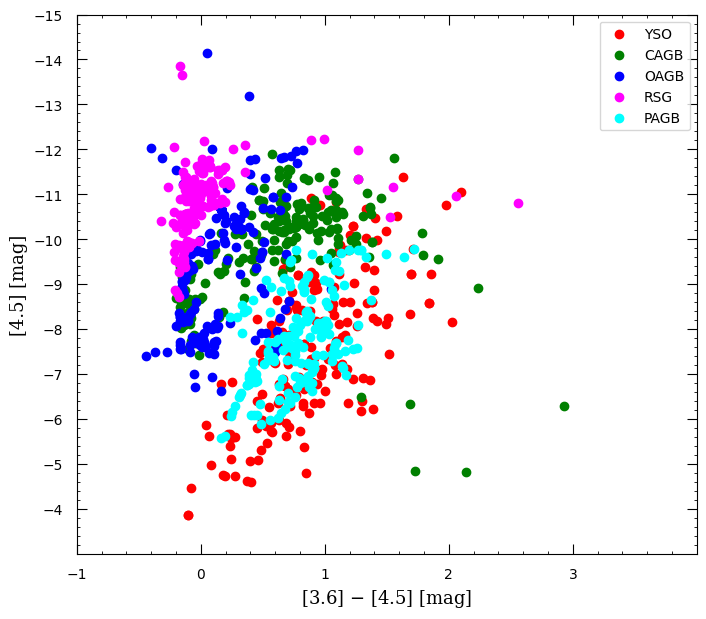

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 4 , -1
ymax , ymin = -3  , -15

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('[3.6] $-$ [4.5] [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('[4.5] [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']

#DSS
for i in range(len(SpClass)):
  df_ = AX_train[AX_train['SpClass'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['[3.6]'] - df_['[4.5]'], df_['[4.5]'] , c=colors[i] ,label = SpClass[i] )

plt.legend(loc='upper right')
plt.savefig('CMD_36_Smote.png', bbox_inches='tight', dpi = 400)

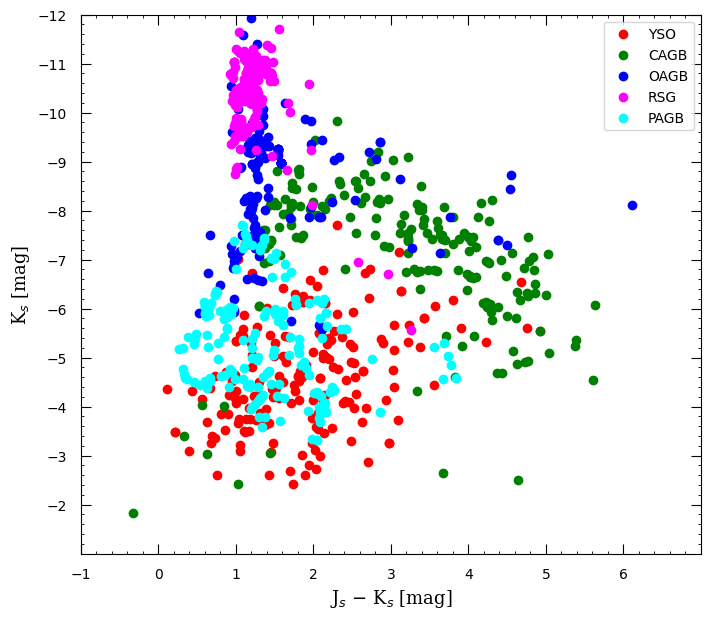

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 7 , -1
ymax , ymin = -1  , -12

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']

#DSS
for i in range(len(SpClass)):
  df_ = AX_train[AX_train['SpClass'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['Jmag'] - df_['Ksmag'], df_['Ksmag'] , c=colors[i] ,label = SpClass[i] )

plt.legend(loc='upper right')
plt.savefig('CMD_J_Smote.png', bbox_inches='tight', dpi = 400)

In [ ]:
AX_train

,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],SpClass
0,1.530726,2.290877,2.030281,1.322575,-1.270366,-3.720000,-6.273000,-9.549100,-10.638100,-11.548700,-12.361100,-14.051200,CAGB
1,0.743193,0.429722,-0.931832,-3.083696,-4.720000,-6.328000,-7.511000,-9.243500,-9.446900,-9.627400,-9.936700,-10.164200,CAGB
2,-2.143000,-4.152000,-5.754000,-8.482341,-9.731000,-10.538000,-10.889000,-11.079800,-11.290500,-11.590300,-11.940100,-14.032500,RSG
3,1.062959,0.684000,-1.580000,-4.169000,-6.148000,-7.302000,-7.843000,-8.905000,-9.348000,-9.968000,-11.118000,-13.737000,OAGB
4,3.545071,3.713175,3.000741,1.709237,-2.010000,-5.705000,-8.118000,-10.247900,-10.938500,-11.517500,-12.320200,-15.532800,OAGB
...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-1.254094,-2.712284,-4.859299,-8.706269,-10.226204,-11.001085,-11.255545,-11.369139,-11.240979,-11.395629,-11.505041,-12.307823,RSG
906,-3.079934,-3.628000,-5.513454,-8.201149,-9.376943,-10.254806,-10.654819,-10.997588,-10.956920,-11.288122,-11.760646,-13.907901,RSG
907,-1.335918,-2.082587,-5.298739,-8.035152,-9.279214,-10.262251,-10.749018,-11.388970,-11.546222,-11.935541,-12.614482,-14.802419,RSG
908,-1.844771,-3.088868,-5.072017,-8.749072,-10.047868,-10.735726,-11.030013,-11.500735,-11.376389,-11.778188,-11.891568,-13.570086,RSG


(array([182.,   0., 182.,   0.,   0., 182.,   0., 182.,   0., 182.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

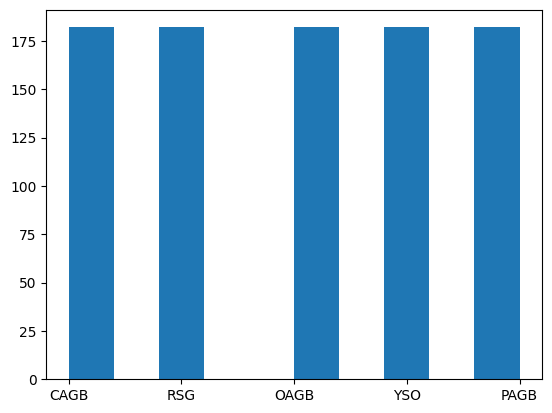

In [ ]:
plt.hist(AX_train['SpClass'])

In [ ]:
AX_train.to_csv('Smote_train_data.csv', header=True, index=True)